In [2]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=b7ddda7329b6598caeb4dbd71c92b1345ababae7843203b36424bb439f36c4e2
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import wandb
from wandb.keras import (
   WandbMetricsLogger,
   WandbModelCheckpoint,
)

In [3]:
run = wandb.init(project="7-7-faces")

wandb: Currently logged in as: mohamad-nematizadehhh. Use `wandb login --relogin` to force relogin


In [4]:
config = wandb.config

In [5]:
wandb_callbacks = [
   WandbMetricsLogger(log_freq=5),
   WandbModelCheckpoint("models"),
]

In [6]:
from IPython.core import history
dataset_path = "/content/drive/MyDrive/Data/7-7 dataset"
width = height = 224
imag_data_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip = True,
    brightness_range=(0.8,1.2),
    validation_split=0.1
)

train_data = imag_data_generator.flow_from_directory(
    dataset_path,
    target_size=(width,height),
    subset="training",
    shuffle=True,
    batch_size=32
)
validation_data = imag_data_generator.flow_from_directory(
    dataset_path,
    target_size=(width,height),
    subset="validation",
    shuffle=False,
    batch_size=32
)


Found 1227 images belonging to 14 classes.
Found 131 images belonging to 14 classes.


In [7]:
next(train_data)[0].shape

(32, 224, 224, 3)

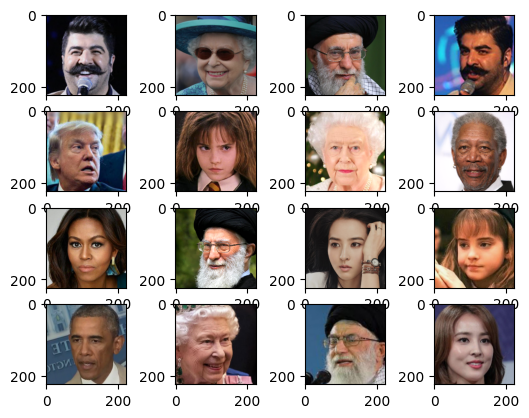

In [8]:
train_imag = next(train_data) [0]
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(train_imag[i])

Create Model

In [9]:
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(width,height,3),
    pooling='avg'
)

In [10]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [11]:
for layer in base_model.layers[0:-4]:
  layer.trainable = False

In [12]:
model = Sequential([
    base_model,
    layers.Dropout(0.2),
    layers.Dense(14,activation="softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 14)                17934     
                                                                 
Total params: 2275918 (8.68 MB)
Trainable params: 430094 (1.64 MB)
Non-trainable params: 1845824 (7.04 MB)
_________________________________________________________________


In [14]:
from keras.src.backend import learning_phase
model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=RMSprop(learning_rate=1e-4), #0.0001
    metrics=['accuracy']
)

In [15]:
plt_model = model.fit(train_data, validation_data=validation_data,callbacks=wandb_callbacks, epochs=10)

Epoch 1/10
39/39 [==============================] - ETA: 0s - loss: 1.8548 - accuracy: 0.4572 

wandb: Adding directory to artifact (./models)... Done. 0.0s


39/39 [==============================] - 706s 18s/step - loss: 1.8548 - accuracy: 0.4572 - val_loss: 1.4958 - val_accuracy: 0.5878
Epoch 2/10
39/39 [==============================] - ETA: 0s - loss: 0.9258 - accuracy: 0.7702

wandb: Adding directory to artifact (./models)... Done. 0.0s


39/39 [==============================] - 29s 751ms/step - loss: 0.9258 - accuracy: 0.7702 - val_loss: 1.1318 - val_accuracy: 0.6260
Epoch 3/10
39/39 [==============================] - ETA: 0s - loss: 0.6122 - accuracy: 0.8672

wandb: Adding directory to artifact (./models)... Done. 0.0s


39/39 [==============================] - 30s 771ms/step - loss: 0.6122 - accuracy: 0.8672 - val_loss: 0.9263 - val_accuracy: 0.6947
Epoch 4/10
39/39 [==============================] - ETA: 0s - loss: 0.4378 - accuracy: 0.9063

wandb: Adding directory to artifact (./models)... Done. 0.0s


39/39 [==============================] - 30s 781ms/step - loss: 0.4378 - accuracy: 0.9063 - val_loss: 0.8278 - val_accuracy: 0.7023
Epoch 5/10
39/39 [==============================] - ETA: 0s - loss: 0.3395 - accuracy: 0.9250

wandb: Adding directory to artifact (./models)... Done. 0.1s


39/39 [==============================] - 30s 772ms/step - loss: 0.3395 - accuracy: 0.9250 - val_loss: 0.7733 - val_accuracy: 0.7328
Epoch 6/10
39/39 [==============================] - ETA: 0s - loss: 0.2719 - accuracy: 0.9478

wandb: Adding directory to artifact (./models)... Done. 0.0s


39/39 [==============================] - 30s 768ms/step - loss: 0.2719 - accuracy: 0.9478 - val_loss: 0.7320 - val_accuracy: 0.7252
Epoch 7/10
39/39 [==============================] - ETA: 0s - loss: 0.2167 - accuracy: 0.9633

wandb: Adding directory to artifact (./models)... Done. 0.0s


39/39 [==============================] - 30s 777ms/step - loss: 0.2167 - accuracy: 0.9633 - val_loss: 0.6827 - val_accuracy: 0.8092
Epoch 8/10
39/39 [==============================] - ETA: 0s - loss: 0.1785 - accuracy: 0.9747

wandb: Adding directory to artifact (./models)... Done. 0.0s


39/39 [==============================] - 29s 759ms/step - loss: 0.1785 - accuracy: 0.9747 - val_loss: 0.6294 - val_accuracy: 0.7863
Epoch 9/10
39/39 [==============================] - ETA: 0s - loss: 0.1441 - accuracy: 0.9845

wandb: Adding directory to artifact (./models)... Done. 0.0s


39/39 [==============================] - 30s 770ms/step - loss: 0.1441 - accuracy: 0.9845 - val_loss: 0.6337 - val_accuracy: 0.7634
Epoch 10/10
39/39 [==============================] - ETA: 0s - loss: 0.1174 - accuracy: 0.9870

wandb: Adding directory to artifact (./models)... Done. 0.0s


39/39 [==============================] - 29s 752ms/step - loss: 0.1174 - accuracy: 0.9870 - val_loss: 0.6309 - val_accuracy: 0.7863


In [ ]:
plt.plot(history.plt_model['loss'],label='Train')
plt.plot(history.plt_model['val_loss'],label='Train')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [15]:
model.save("face_recognition.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
